https://poloclub.github.io/cnn-explainer/

In [27]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [60]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [63]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [64]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

#### Explored a few images

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

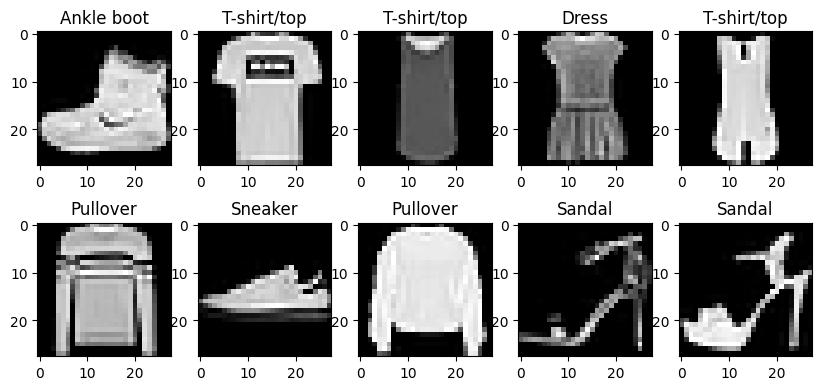

In [25]:
plt.figure(figsize=(10,12))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

### Define the model

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense

In [73]:
model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (3,3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters = 5, kernel_size = (3,3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (3,3), strides = (1,1)))

model.add(Flatten())

model.add(Dense(45, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [74]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [77]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size = 5000,
         validation_data=(x_test, y_test_ohe),
         epochs=5)

Epoch 1/5
12/12 [==============================] - 11s 953ms/step - loss: 0.4159 - accuracy: 0.8531 - val_loss: 0.4759 - val_accuracy: 0.8339
Epoch 2/5
12/12 [==============================] - 12s 997ms/step - loss: 0.4077 - accuracy: 0.8556 - val_loss: 0.4699 - val_accuracy: 0.8354
Epoch 3/5
12/12 [==============================] - 12s 1s/step - loss: 0.4003 - accuracy: 0.8583 - val_loss: 0.4658 - val_accuracy: 0.8364
Epoch 4/5
12/12 [==============================] - 12s 970ms/step - loss: 0.3951 - accuracy: 0.8595 - val_loss: 0.4607 - val_accuracy: 0.8392
Epoch 5/5
12/12 [==============================] - 11s 905ms/step - loss: 0.3870 - accuracy: 0.8623 - val_loss: 0.4560 - val_accuracy: 0.8405


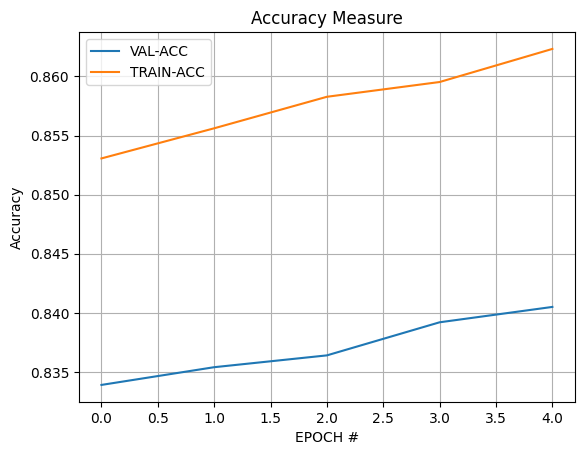

In [78]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

In [71]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['VAL-LOSS', 'TRAIN-LOSS'])
plt.title("Loss Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Loss")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (5000, 26, 26, 10)        100       
_________________________________________________________________
activation_7 (Activation)    (5000, 26, 26, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (5000, 24, 24, 5)         455       
_________________________________________________________________
activation_8 (Activation)    (5000, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (5000, 22, 22, 5)         0         
_________________________________________________________________
flatten_6 (Flatten)          (5000, 2420)              0         
_________________________________________________________________
dense_12 (Dense)             (5000, 45)               